In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
# python 3.7

# For yahoo finance
import io
import re
import requests
import yfinance as yf

# The usual suspects
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

'''
#  Fancy graphics
plt.style.use('seaborn')
# Getting Yahoo finance data
def getdata(tickers,start,end,frequency):
    OHLC    = {}
    cookie  = ''
    crumb   = ''
    res     = requests.get('https://finance.yahoo.com/quote/SPY/history')
    cookie  = res.cookies['B']
    pattern = re.compile('.*"CrumbStore":\{"crumb":"(?P<crumb>[^"]+)"\}')
    for line in res.text.splitlines():
        m = pattern.match(line)
        if m is not None:
            crumb = m.groupdict()['crumb']
    for ticker in tickers:
        url_str  = "https://query1.finance.yahoo.com/v7/finance/download/%s"
        url_str += "?period1=%s&period2=%s&interval=%s&events=history&crumb=%s"
        url = url_str % (ticker, start, end, frequency, crumb)
        res = requests.get(url, cookies={'B': cookie}).text
        OHLC[ticker] = pd.read_csv(io.StringIO(res), index_col=0,
                                   error_bad_lines=False).replace('null', np.nan).dropna()
        OHLC[ticker].index = pd.to_datetime(OHLC[ticker].index)
        OHLC[ticker] = OHLC[ticker].apply(pd.to_numeric)
    return OHLC

# Assets under consideration
tickers = ['%5EGSPTSE','%5EGSPC','%5ESTOXX','000001.SS']

# If yahoo data retrieval fails, try until it returns something
data = None
while data is None:
    try:
        data = getdata(tickers,'946685000','1685008000','1d')
    except:
         pass

ICP = pd.DataFrame({'SP500':    data['%5EGSPC']['Adj Close'],
                    'TSX':      data['%5EGSPTSE']['Adj Close'],
                    'STOXX600': data['%5ESTOXX']['Adj Close'],
                    'SSE':      data['000001.SS']['Adj Close']}).fillna(method='ffill')
'''

startday ='2005-01-01'
SP500 =yf.download('%5EGSPC',start = startday)
TSX = yf.download('%5EGSPTSE', start =startday)
STOXX600 = yf.download('%5ESTOXX', start =startday)
SSE = yf.download('000001.SS', start =startday)
AAPL =yf.download('AAPL', start =startday)
NVDA =yf.download('NVDA', start =startday)

ICP =pd.DataFrame ({'SP500':    SP500['Adj Close'],
                    'TSX':      TSX['Adj Close'],
                    'STOXX600': STOXX600['Adj Close'], 
                    # 'AAPL':     AAPL['Adj Close'],
                    # 'NVDA':     NVDA['Adj Close']}
                    'SSE':      SSE['Adj Close']}).fillna(method='ffill')
# since last commit, yahoo finance decided to mess up (more) some of the tickers data, so now we have to drop rows...
ICP = ICP.dropna()

print(ICP)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  SP500           TSX    STOXX600          SSE
Date                                                          
2005-01-04  1188.050049   9143.000000  253.550003  1242.774048
2005-01-05  1183.739990   9021.099609  251.850006  1251.937012
2005-01-06  1187.890015   9064.299805  253.089996  1239.430054
2005-01-07  1186.189941   9006.200195  254.720001  1244.745972
2005-01-10  1190.250000   9026.799805  254.619995  1252.401001
...                 ...           ...         ...          ...
2024-05-01  5018.390137  21728.599609  504.890015  3104.824951
2024-05-02  5064.200195  21823.199219  503.209991  3104.824951
2024-05-03  5127.790039  21947.400391  505.529999  3104.824951
2024-05-06  5180.740234  22259.500000  508.220001  3140.719971
2024-05-07  5180.740234  22330.900391  514.020020  3147.738037

[5029 rows x 4 columns]



C:\Users\sagir\AppData\Local\Temp\ipykernel_18804\4129660170.py:65: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ICP =pd.DataFrame ({'SP500':    SP500['Adj Close'],


In [3]:
BuyHold_SP     = ICP['SP500']    /float(ICP['SP500'][:1])   -1
BuyHold_TSX    = ICP['TSX']      /float(ICP['TSX'][:1])     -1
BuyHold_STOXX  = ICP['STOXX600'] /float(ICP['STOXX600'][:1])-1
BuyHold_SSE    = ICP['SSE']      /float(ICP['SSE'][:1])     -1

BuyHold_25Each = BuyHold_SP*(1/4) + BuyHold_TSX*(1/4) + BuyHold_STOXX*(1/4) + BuyHold_SSE*(1/4)

C:\Users\sagir\AppData\Local\Temp\ipykernel_18804\3313115319.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  BuyHold_SP     = ICP['SP500']    /float(ICP['SP500'][:1])   -1
C:\Users\sagir\AppData\Local\Temp\ipykernel_18804\3313115319.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  BuyHold_TSX    = ICP['TSX']      /float(ICP['TSX'][:1])     -1
C:\Users\sagir\AppData\Local\Temp\ipykernel_18804\3313115319.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  BuyHold_STOXX  = ICP['STOXX600'] /float(ICP['STOXX600'][:1])-1
C:\Users\sagir\AppData\Local\Temp\ipykernel_18804\3313115319.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the futu

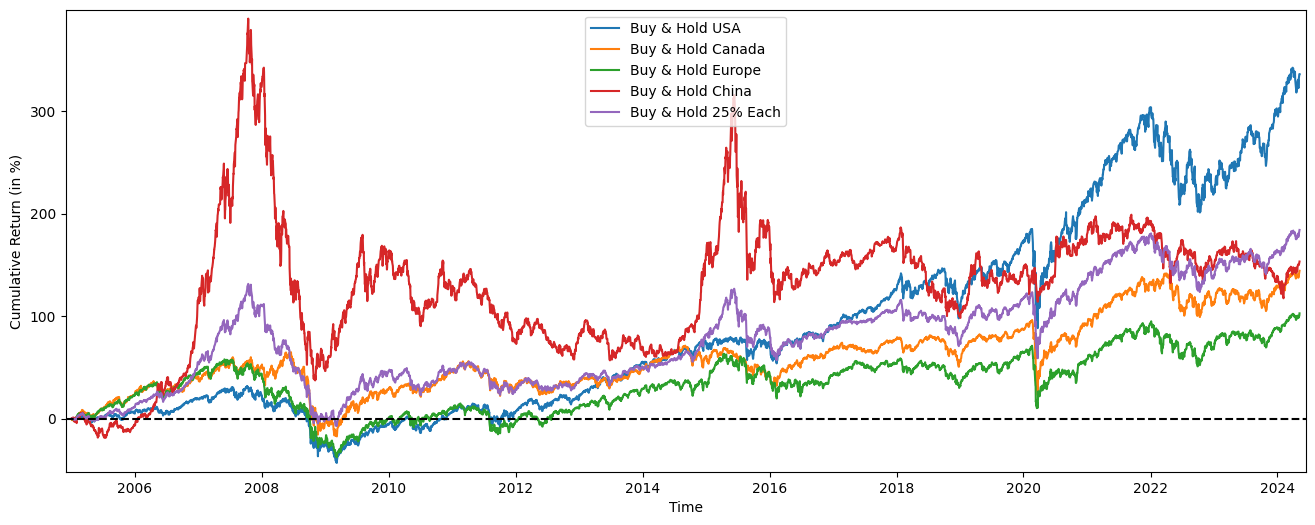

In [4]:
plt.figure(figsize=(16,6))
plt.plot(BuyHold_SP*100,     label='Buy & Hold USA')
plt.plot(BuyHold_TSX*100,    label='Buy & Hold Canada')
plt.plot(BuyHold_STOXX*100,  label='Buy & Hold Europe')
plt.plot(BuyHold_SSE*100,    label='Buy & Hold China')
plt.plot(BuyHold_25Each*100, label='Buy & Hold 25% Each')
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

In [5]:
SP1Y     = ICP['SP500']    /ICP['SP500'].shift(252)   -1
TSX1Y    = ICP['TSX']      /ICP['TSX'].shift(252)     -1
STOXX1Y  = ICP['STOXX600'] /ICP['STOXX600'].shift(252)-1
SSE1Y    = ICP['SSE']      /ICP['SSE'].shift(252)     -1
#AAPL1Y    = ICP['AAPL']    /ICP['AAPL'].shift(252)    -1
#NVDA1Y    = ICP['NVDA']    /ICP['NVDA'].shift(252)    -1

Each251Y = SP1Y*(1/4) + TSX1Y*(1/4) +STOXX1Y*(1/4) + SSE1Y*(1/4)

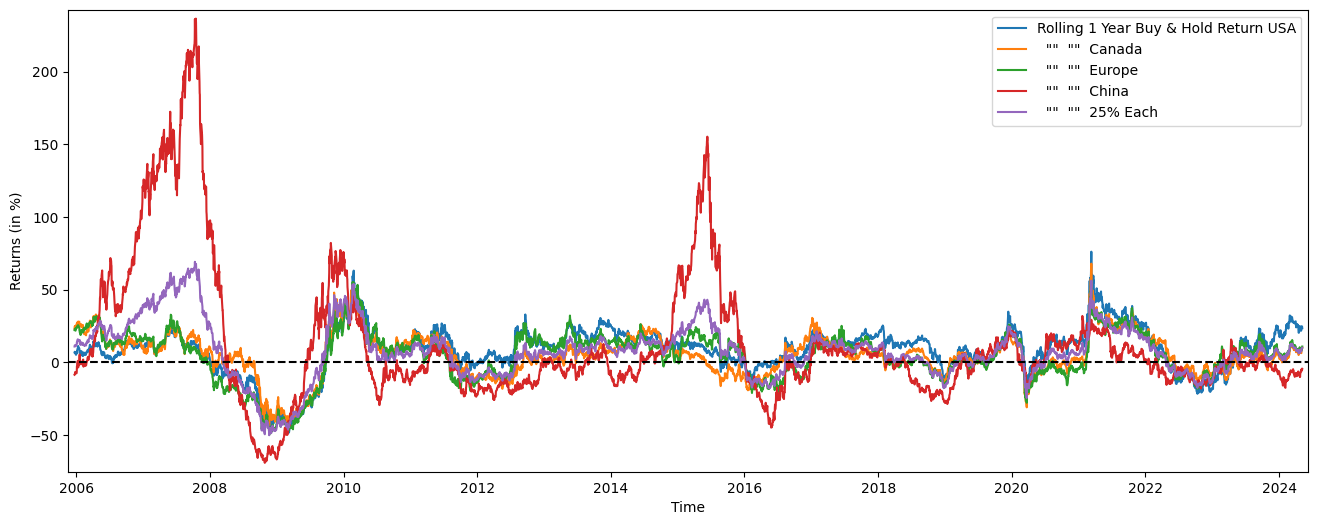

In [6]:
plt.figure(figsize=(16,6))
plt.plot(SP1Y*100,     label='Rolling 1 Year Buy & Hold Return USA')
plt.plot(TSX1Y*100,    label='  ""  ""  Canada')
plt.plot(STOXX1Y*100,  label='  ""  ""  Europe')
plt.plot(SSE1Y*100,    label='  ""  ""  China')
plt.plot(Each251Y*100, label='  ""  ""  25% Each')
#plt.plot(AAPL1Y*100, label='  ""  ""  AAPL')
#plt.plot(NVDA1Y*100, label='  ""  ""  NVDA')
plt.xlabel('Time')
plt.ylabel('Returns (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

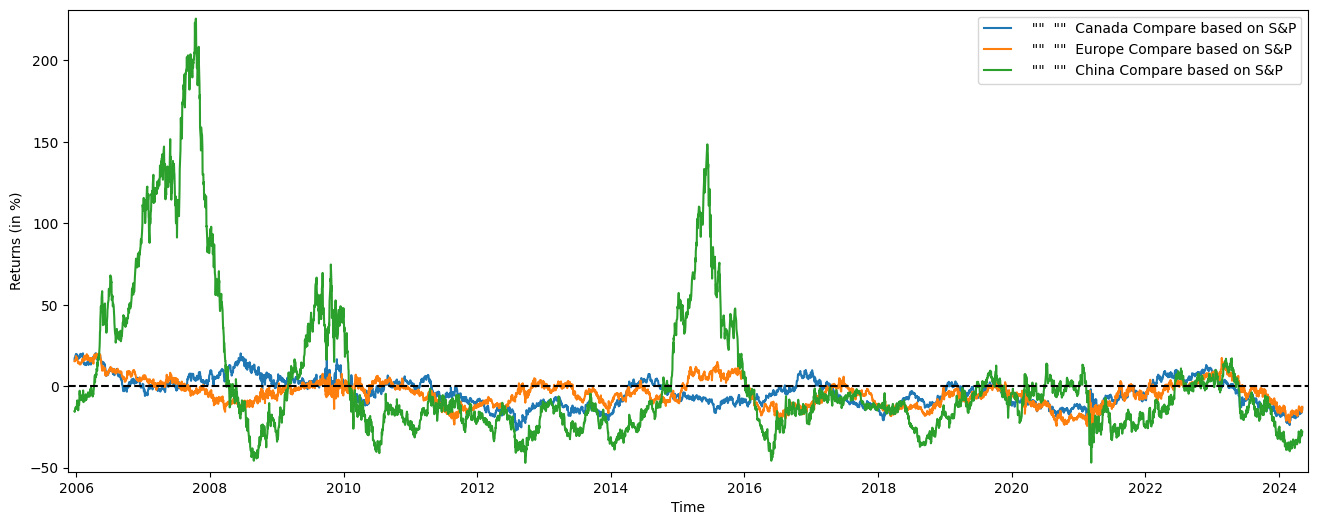

In [7]:
##add 2 - S&P 대비 수익률

TSX1Y_    = TSX1Y -SP1Y
STOXX1Y_  = STOXX1Y -SP1Y
SSE1Y_    = SSE1Y -SP1Y
#AAPL1Y_   = AAPL1Y -SP1Y
#NVDA1Y_   = NVDA1Y -SP1Y

plt.figure(figsize=(16,6))
plt.plot(TSX1Y_*100,    label='  ""  ""  Canada Compare based on S&P')
plt.plot(STOXX1Y_*100,  label='  ""  ""  Europe Compare based on S&P')
plt.plot(SSE1Y_*100,    label='  ""  ""  China Compare based on S&P')
#plt.plot(AAPL1Y_*100,    label='  ""  ""  AAPL Compare based on S&P')
#plt.plot(NVDA1Y_*100,    label='  ""  ""  NVDA Compare based on S&P')
plt.xlabel('Time')
plt.ylabel('Returns (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

In [8]:
marr      = 0 #minimal acceptable rate of return (usually equal to the risk free rate)
SP1YS     = (SP1Y.mean()    -marr) /SP1Y.std()
TSX1YS    = (TSX1Y.mean()   -marr) /TSX1Y.std()
STOXX1YS  = (STOXX1Y.mean() -marr) /STOXX1Y.std()
SSE1YS    = (SSE1Y.mean()   -marr) /SSE1Y.std()
Each251YS = (Each251Y.mean()-marr) /Each251Y.std()

print('SP500 1 Year Buy & Hold Sharpe Ratio =',round(SP1YS,2))
print('TSX      "" "" =',round(TSX1YS   ,2))
print('STOXX600 "" "" =',round(STOXX1YS ,2))
print('SSE      "" "" =',round(SSE1YS   ,2))
print('25% Each "" "" =',round(Each251YS,2))

SP500 1 Year Buy & Hold Sharpe Ratio = 0.55
TSX      "" "" = 0.34
STOXX600 "" "" = 0.26
SSE      "" "" = 0.27
25% Each "" "" = 0.4


In [9]:
from scipy.optimize import minimize

def multi(x):
    a, b, c, d = x
    return a, b, c, d   #the "optimal" weights we wish to discover

def maximize_sharpe(x): #objective function
    weights = (SP1Y*multi(x)[0] + TSX1Y*multi(x)[1]
               + STOXX1Y*multi(x)[2] + SSE1Y*multi(x)[3])
    return -(weights.mean()/weights.std())

def constraint(x):      #since we're not using leverage nor short positions
    return 1 - (multi(x)[0]+multi(x)[1]+multi(x)[2]+multi(x)[3])

cons = ({'type':'ineq','fun':constraint})
bnds = ((0,1),(0,1),(0,1),(0,1))

initial_guess = (1, 0, 0, 0)

# this algorithm (SLSQP) easly gets stuck on a local
# optimal solution, genetic algorithms usually yield better results
# so my inital guess is close to the global optimal solution

ms = minimize(maximize_sharpe, initial_guess, method='SLSQP',
              bounds=bnds, constraints=cons, options={'maxiter': 10000})

msBuyHoldAll = (BuyHold_SP*ms.x[0] + BuyHold_TSX*ms.x[1]
                + BuyHold_STOXX*ms.x[2] + BuyHold_SSE*ms.x[3])

msBuyHold1yAll = (SP1Y*ms.x[0] + TSX1Y*ms.x[1]
                   + STOXX1Y*ms.x[2] + SSE1Y*ms.x[3])

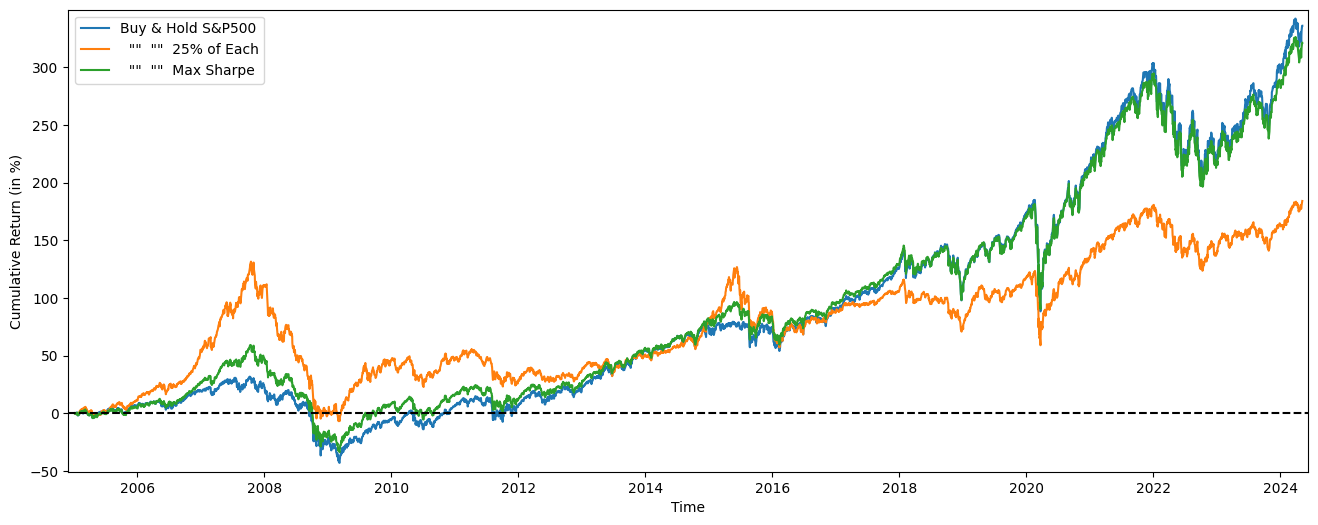

SP500 Weight = 91.92 %
TSX ""       = 0.0 %
STOXX600 ""  = 0.0 %
SSE ""       = 8.08 %

Sharpe = 0.561

Median yearly excess return over SP500 = 0.4 %


In [10]:
plt.figure(figsize=(16,6))
plt.plot(BuyHold_SP*100,     label='Buy & Hold S&P500')
plt.plot(BuyHold_25Each*100, label='  ""  ""  25% of Each')
plt.plot(msBuyHoldAll*100,   label='  ""  ""  Max Sharpe')
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()


print('SP500 Weight =',round(ms.x[0]*100,2),'%')
print('TSX ""       =',round(ms.x[1]*100,2),'%')
print('STOXX600 ""  =',round(ms.x[2]*100,2),'%')
print('SSE ""       =',round(ms.x[3]*100,2),'%')
print()
print('Sharpe =',round(msBuyHold1yAll.mean()/msBuyHold1yAll.std(),3))
print()
print('Median yearly excess return over SP500 =',round((msBuyHold1yAll.median()-SP1Y.median())*100,1),'%')

In [11]:
def maximize_median_yearly_return(x): #different objective function
    weights = (SP1Y*multi(x)[0] + TSX1Y*multi(x)[1]
               + STOXX1Y*multi(x)[2] + SSE1Y*multi(x)[3])
    return -(float(weights.median()))

mm = minimize(maximize_median_yearly_return, initial_guess, method='SLSQP',
              bounds=bnds, constraints=cons, options={'maxiter': 10000})

mmBuyHoldAll = (BuyHold_SP*mm.x[0] + BuyHold_TSX*mm.x[1]
                + BuyHold_STOXX*mm.x[2] + BuyHold_SSE*mm.x[3])

mmBuyHold1yAll = (SP1Y*mm.x[0] + TSX1Y*mm.x[1]
                   + STOXX1Y*mm.x[2] + SSE1Y*mm.x[3])

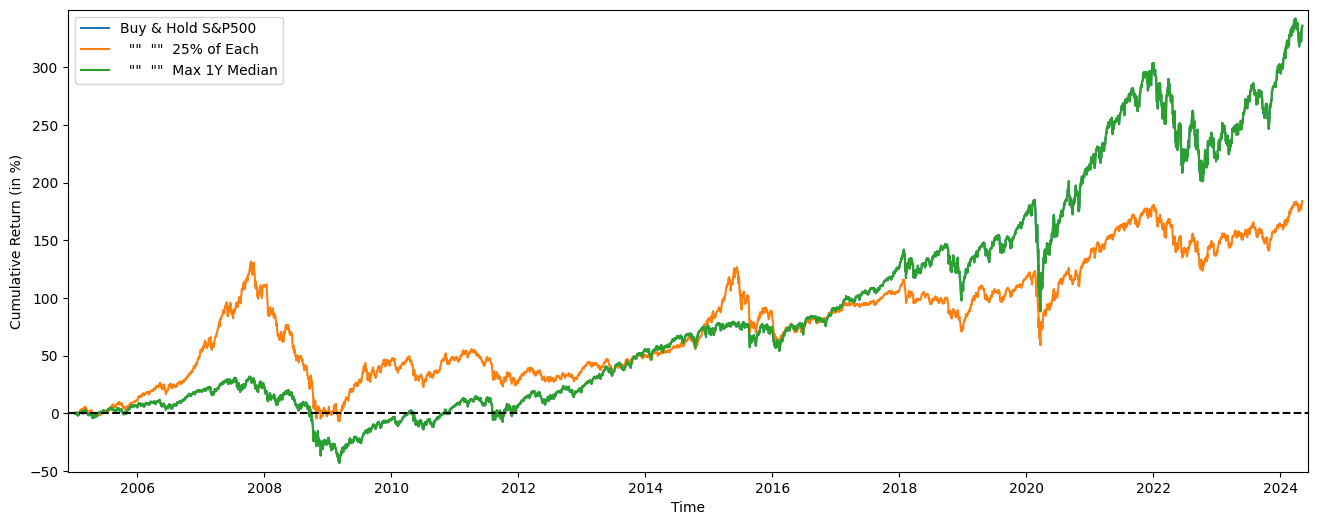

SP500 Weight = 100.0 %
TSX ""       = 0.0 %
STOXX600 ""  = 0.0 %
SSE ""       = 0.0 %

Sharpe = 0.547

Median yearly excess return over SP500 = -0.0 %


In [12]:
plt.figure(figsize=(16,6))
plt.plot(BuyHold_SP*100,     label='Buy & Hold S&P500')
plt.plot(BuyHold_25Each*100, label='  ""  ""  25% of Each')
plt.plot(mmBuyHoldAll*100,   label='  ""  ""  Max 1Y Median')
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

print('SP500 Weight =',round(mm.x[0]*100,2),'%')
print('TSX ""       =',round(mm.x[1]*100,2),'%')
print('STOXX600 ""  =',round(mm.x[2]*100,2),'%')
print('SSE ""       =',round(mm.x[3]*100,2),'%')
print()
print('Sharpe =',round(mmBuyHold1yAll.mean()/mmBuyHold1yAll.std(),3))
print()
print('Median yearly excess return over SP500 =',round((mmBuyHold1yAll.median()-SP1Y.median())*100,1),'%')

In [13]:
YTD_SP     = ICP['SP500'][-252:]    /float(ICP['SP500'][-252])   -1
YTD_TSX    = ICP['TSX'][-252:]      /float(ICP['TSX'][-252])     -1
YTD_STOXX  = ICP['STOXX600'][-252:] /float(ICP['STOXX600'][-252])-1
YTD_SSE    = ICP['SSE'][-252:]      /float(ICP['SSE'][-252])     -1

YTD_25Each = YTD_SP*(1/4) + YTD_TSX*(1/4) + YTD_STOXX*(1/4) + YTD_SSE*(1/4)

YTD_max_sharpe = YTD_SP*ms.x[0] + YTD_TSX*ms.x[1] + YTD_STOXX*ms.x[2] + YTD_SSE*ms.x[3]
YTD_max_median = YTD_SP*mm.x[0] + YTD_TSX*mm.x[1] + YTD_STOXX*mm.x[2] + YTD_SSE*mm.x[3]

C:\Users\sagir\AppData\Local\Temp\ipykernel_18804\3011359308.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  YTD_SP     = ICP['SP500'][-252:]    /float(ICP['SP500'][-252])   -1
C:\Users\sagir\AppData\Local\Temp\ipykernel_18804\3011359308.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  YTD_TSX    = ICP['TSX'][-252:]      /float(ICP['TSX'][-252])     -1
C:\Users\sagir\AppData\Local\Temp\ipykernel_18804\3011359308.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a va

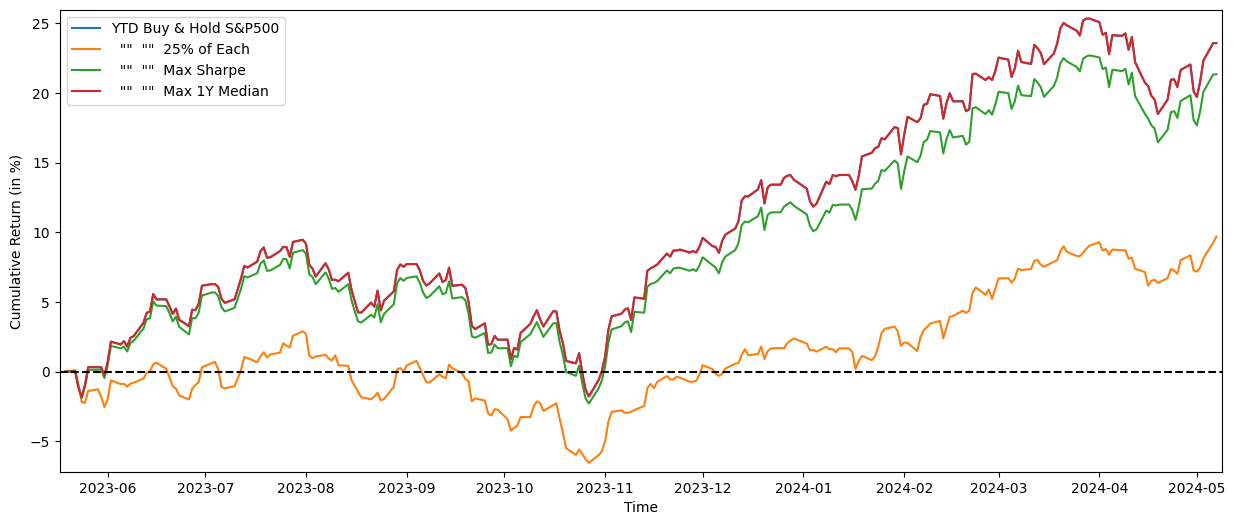

Buy & Hold S&P500 YTD Performance  = 23.6 %
 "" "" 25% of Each   "" "" = 9.7 %
 "" "" Max Sharpe    "" "" = 21.3 %
 "" "" Max 1Y Median "" "" = 23.6 %


C:\Users\sagir\AppData\Local\Temp\ipykernel_18804\159085453.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Buy & Hold S&P500 YTD Performance  =',round(float(YTD_SP[-1:]*100),1),'%')
C:\Users\sagir\AppData\Local\Temp\ipykernel_18804\159085453.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(' "" "" 25% of Each   "" "" =',round(float(YTD_25Each[-1:]*100),1),'%')
C:\Users\sagir\AppData\Local\Temp\ipykernel_18804\159085453.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(' "" "" Max Sharpe    "" "" =',round(float(YTD_max_sharpe[-1:]*100),1),'%')
C:\Users\sagir\AppData\Local\Temp\ipykernel_18804\159085453.py:16: FutureWarning: Calling float on a single element Series

In [14]:
plt.figure(figsize=(15,6))
plt.plot(YTD_SP*100,         label='YTD Buy & Hold S&P500')
plt.plot(YTD_25Each*100,     label='  ""  ""  25% of Each')
plt.plot(YTD_max_sharpe*100, label='  ""  ""  Max Sharpe')
plt.plot(YTD_max_median*100, label='  ""  ""  Max 1Y Median')
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

print('Buy & Hold S&P500 YTD Performance  =',round(float(YTD_SP[-1:]*100),1),'%')
print(' "" "" 25% of Each   "" "" =',round(float(YTD_25Each[-1:]*100),1),'%')
print(' "" "" Max Sharpe    "" "" =',round(float(YTD_max_sharpe[-1:]*100),1),'%')
print(' "" "" Max 1Y Median "" "" =',round(float(YTD_max_median[-1:]*100),1),'%')

In [15]:
ICP['SPRet']    = ICP['SP500'] /ICP['SP500'].shift(1)-1
ICP['SSERet']   = ICP['SSE']   /ICP['SSE'].shift(1)  -1

ICP['Strat'] = ICP['SPRet'] * 0.8 + ICP['SSERet'] * 0.2

ICP['Strat'][SP1Y.shift(1)  > -0.17] = ICP['SSERet']*0 + ICP['SPRet']*1
ICP['Strat'][SSE1Y.shift(1) > 0.29]  = ICP['SSERet']*1 + ICP['SPRet']*0

DynAssAll    = ICP['Strat'].cumsum()
DynAssAll1y  = ICP['Strat'].rolling(window=252).sum()
DynAssAllytd = ICP['Strat'][-252:].cumsum()

C:\Users\sagir\AppData\Local\Temp\ipykernel_18804\427026680.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ICP['Strat'][SP1Y.shift(1)  > -0.17] = ICP['SSERet']*0 + ICP['SPRet']*1
C:\Users\sagir\AppData\Local\Temp\ipykernel_18804\4270266

NameError: name 'DynAssAll' is not defined

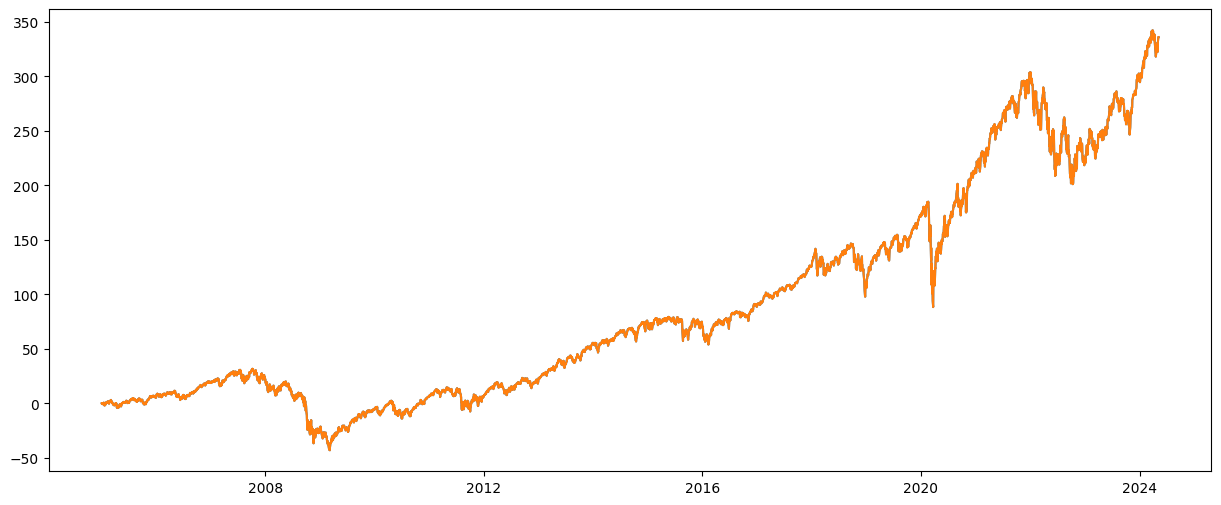

In [14]:
plt.figure(figsize=(15,6))
plt.plot(BuyHold_SP*100,     label='Buy & Hold SP&500')
plt.plot(mmBuyHoldAll*100,   label='  ""  ""  Max 1Y Median')
plt.plot(DynAssAll*100,      label='Dynamic Asset Allocation')
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

print('Median yearly excess return over SP500 =',round(float(DynAssAll1y.median()-SP1Y.median())*100,1),'%')

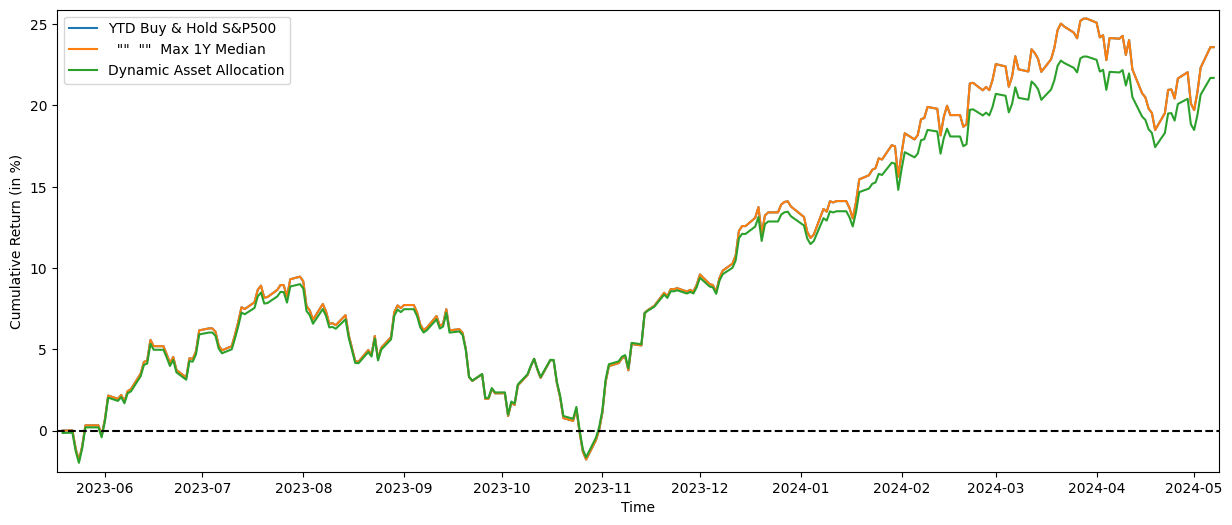

Buy & Hold S&P500 YTD Performance  = 23.6 %
 "" "" Max 1Y Median "" ""  = 23.6 %
 Strategy YTD Performance   = 21.7 %


C:\Users\sagir\AppData\Local\Temp\ipykernel_15828\3068426611.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Buy & Hold S&P500 YTD Performance  =',round(float(YTD_SP[-1:]*100),1),'%')
C:\Users\sagir\AppData\Local\Temp\ipykernel_15828\3068426611.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(' "" "" Max 1Y Median "" ""  =',round(float(YTD_max_median[-1:]*100),1),'%')
C:\Users\sagir\AppData\Local\Temp\ipykernel_15828\3068426611.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(' Strategy YTD Performance   =',round(float(DynAssAllytd[-1:]*100),1),'%')


In [15]:
plt.figure(figsize=(15,6))
plt.plot(YTD_SP*100,         label='YTD Buy & Hold S&P500')
plt.plot(YTD_max_median*100, label='  ""  ""  Max 1Y Median')
plt.plot(DynAssAllytd*100,   label='Dynamic Asset Allocation')
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

print('Buy & Hold S&P500 YTD Performance  =',round(float(YTD_SP[-1:]*100),1),'%')
print(' "" "" Max 1Y Median "" ""  =',round(float(YTD_max_median[-1:]*100),1),'%')
print(' Strategy YTD Performance   =',round(float(DynAssAllytd[-1:]*100),1),'%')